In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [6]:
housing = pd.read_csv('sam_train.csv')

In [8]:
columns = [x for x in housing.columns]
#print(columns)

In [4]:
columns

['Unnamed: 0',
 'x1stflrsf',
 'x2ndflrsf',
 'grlivarea',
 'totrmsabvgrd',
 'centralair_y',
 'masvnrarea',
 'totalbsmtsf',
 'mssubclass',
 'lotarea',
 'overallqual',
 'neighborhood',
 'yearbuilt',
 'overallcond',
 'garagecars',
 'garagearea',
 'openporchsf',
 'paveddrive_fy',
 'saletype_fcwd',
 'garagefinish_fnone',
 'fence_fnone',
 'fireplaces',
 'heatingqc_ex',
 'saleprice']

In [9]:
housing_features = housing.drop(['saleprice', 'Unnamed: 0'], axis=1)
housing_features.neighborhood = [str(x) for x in housing_features.neighborhood]
housing_features.mssubclass = [str(x) for x in housing_features.mssubclass]
housing_features = pd.get_dummies(housing_features, prefix=['nbhood', 'msclass'], 
                                  columns = ['neighborhood', 'mssubclass'], 
                                  drop_first = True)
feat_labels = housing_features.columns
print(feat_labels)

prices = [np.log(x) for x in housing.saleprice]

Index(['x1stflrsf', 'x2ndflrsf', 'grlivarea', 'totrmsabvgrd', 'centralair_y',
       'masvnrarea', 'totalbsmtsf', 'lotarea', 'overallqual', 'yearbuilt',
       'overallcond', 'garagecars', 'garagearea', 'openporchsf',
       'paveddrive_fy', 'saletype_fcwd', 'garagefinish_fnone', 'fence_fnone',
       'fireplaces', 'heatingqc_ex', 'nbhood_1', 'nbhood_10', 'nbhood_11',
       'nbhood_12', 'nbhood_13', 'nbhood_14', 'nbhood_15', 'nbhood_16',
       'nbhood_17', 'nbhood_18', 'nbhood_19', 'nbhood_2', 'nbhood_20',
       'nbhood_21', 'nbhood_22', 'nbhood_23', 'nbhood_24', 'nbhood_3',
       'nbhood_4', 'nbhood_5', 'nbhood_6', 'nbhood_7', 'nbhood_8', 'nbhood_9',
       'msclass_160', 'msclass_180', 'msclass_190', 'msclass_20', 'msclass_30',
       'msclass_40', 'msclass_45', 'msclass_50', 'msclass_60', 'msclass_70',
       'msclass_75', 'msclass_80', 'msclass_85', 'msclass_90'],
      dtype='object')


In [18]:
# Split into training and test set
features_train, features_test, price_train, price_test = train_test_split(housing_features, prices, test_size = 0.2)

In [11]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit

NameError: name 'preprocessing' is not defined

In [13]:
# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(features_train, price_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

In [32]:
dummy_features = features_train.iloc[:,20:]
dummy_features.head()

,nbhood_1,nbhood_10,nbhood_11,nbhood_12,nbhood_13,nbhood_14,nbhood_15,nbhood_16,nbhood_17,nbhood_18,...,msclass_30,msclass_40,msclass_45,msclass_50,msclass_60,msclass_70,msclass_75,msclass_80,msclass_85,msclass_90
784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1179,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
466,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
features_train.columns[20:]

Index(['nbhood_1', 'nbhood_10', 'nbhood_11', 'nbhood_12', 'nbhood_13',
       'nbhood_14', 'nbhood_15', 'nbhood_16', 'nbhood_17', 'nbhood_18',
       'nbhood_19', 'nbhood_2', 'nbhood_20', 'nbhood_21', 'nbhood_22',
       'nbhood_23', 'nbhood_24', 'nbhood_3', 'nbhood_4', 'nbhood_5',
       'nbhood_6', 'nbhood_7', 'nbhood_8', 'nbhood_9', 'msclass_160',
       'msclass_180', 'msclass_190', 'msclass_20', 'msclass_30', 'msclass_40',
       'msclass_45', 'msclass_50', 'msclass_60', 'msclass_70', 'msclass_75',
       'msclass_80', 'msclass_85', 'msclass_90'],
      dtype='object')

In [16]:
sfm = SelectFromModel(clf, threshold = 0.005)

sfm.fit(features_train, price_train)

feature_selected = []
for feature_list_index in sfm.get_support(indices=True):
    feature_selected.append(feat_labels[feature_list_index])
    print(feature_selected)

['x1stflrsf']
['x1stflrsf', 'x2ndflrsf']
['x1stflrsf', 'x2ndflrsf', 'grlivarea']
['x1stflrsf', 'x2ndflrsf', 'grlivarea', 'totrmsabvgrd']
['x1stflrsf', 'x2ndflrsf', 'grlivarea', 'totrmsabvgrd', 'centralair_y']
['x1stflrsf', 'x2ndflrsf', 'grlivarea', 'totrmsabvgrd', 'centralair_y', 'masvnrarea']
['x1stflrsf', 'x2ndflrsf', 'grlivarea', 'totrmsabvgrd', 'centralair_y', 'masvnrarea', 'totalbsmtsf']
['x1stflrsf', 'x2ndflrsf', 'grlivarea', 'totrmsabvgrd', 'centralair_y', 'masvnrarea', 'totalbsmtsf', 'lotarea']
['x1stflrsf', 'x2ndflrsf', 'grlivarea', 'totrmsabvgrd', 'centralair_y', 'masvnrarea', 'totalbsmtsf', 'lotarea', 'overallqual']
['x1stflrsf', 'x2ndflrsf', 'grlivarea', 'totrmsabvgrd', 'centralair_y', 'masvnrarea', 'totalbsmtsf', 'lotarea', 'overallqual', 'yearbuilt']
['x1stflrsf', 'x2ndflrsf', 'grlivarea', 'totrmsabvgrd', 'centralair_y', 'masvnrarea', 'totalbsmtsf', 'lotarea', 'overallqual', 'yearbuilt', 'overallcond']
['x1stflrsf', 'x2ndflrsf', 'grlivarea', 'totrmsabvgrd', 'centralair_y'

In [29]:
trimmed = ['x1stflrsf', 'x2ndflrsf', 'garagecars', 'overallcond', 'saleprice', 'Unnamed: 0']



feature_selected = [x for x in feature_selected if (x in trimmed)]



features_selected = [x for x in housing.columns if (x )]

print(cols)

['grlivarea', 'totrmsabvgrd', 'centralair_y', 'masvnrarea', 'totalbsmtsf', 'mssubclass', 'lotarea', 'overallqual', 'neighborhood', 'yearbuilt', 'garagearea', 'openporchsf', 'paveddrive_fy', 'saletype_fcwd', 'garagefinish_fnone', 'fence_fnone', 'fireplaces', 'heatingqc_ex']


In [30]:
housing_features = housing.drop(['saleprice', 'Unnamed: 0'], axis=1)
housing_features = housing_features[cols]
housing_features.neighborhood = [str(x) for x in housing_features.neighborhood]
housing_features.mssubclass = [str(x) for x in housing_features.mssubclass]
housing_features = pd.get_dummies(housing_features, prefix=['nbhood', 'msclass'], 
                                  columns = ['neighborhood', 'mssubclass'], 
                                  drop_first = True)
feat_labels = housing_features.columns
print(feat_labels)

prices = [np.log(x) for x in housing.saleprice]

Index(['grlivarea', 'totrmsabvgrd', 'centralair_y', 'masvnrarea',
       'totalbsmtsf', 'lotarea', 'overallqual', 'yearbuilt', 'garagearea',
       'openporchsf', 'paveddrive_fy', 'saletype_fcwd', 'garagefinish_fnone',
       'fence_fnone', 'fireplaces', 'heatingqc_ex', 'nbhood_1', 'nbhood_10',
       'nbhood_11', 'nbhood_12', 'nbhood_13', 'nbhood_14', 'nbhood_15',
       'nbhood_16', 'nbhood_17', 'nbhood_18', 'nbhood_19', 'nbhood_2',
       'nbhood_20', 'nbhood_21', 'nbhood_22', 'nbhood_23', 'nbhood_24',
       'nbhood_3', 'nbhood_4', 'nbhood_5', 'nbhood_6', 'nbhood_7', 'nbhood_8',
       'nbhood_9', 'msclass_160', 'msclass_180', 'msclass_190', 'msclass_20',
       'msclass_30', 'msclass_40', 'msclass_45', 'msclass_50', 'msclass_60',
       'msclass_70', 'msclass_75', 'msclass_80', 'msclass_85', 'msclass_90'],
      dtype='object')


In [42]:
linear = LinearRegression()

cv = cross_val_score(linear, features_train, price_train, cv=5)



0.8491186645626112

In [114]:
# lasso = Lasso()
# alphas = np.linspace(0.1,100,100)
# lasso.set_params(normalize=False)
# coefs_lasso  = []
# score_lasso = []

# for alpha in alphas:
#         lasso.set_params(alpha=alpha)
#         lasso.fit(features_train, price_train)  
#         coefs_lasso.append(lasso.coef_)
#         score_lasso.append(lasso.score(features_test, price_test))

# coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = features_train.columns)  
# coefs_lasso['score'] = score_lasso

In [113]:
# coefs_lasso.head()
# coefs_lasso = coefs_lasso[coefs_lasso.score > 0.7]
# print(coefs_lasso.shape)
# print(coefs_lasso.score)

(0, 128)
Series([], Name: score, dtype: float64)


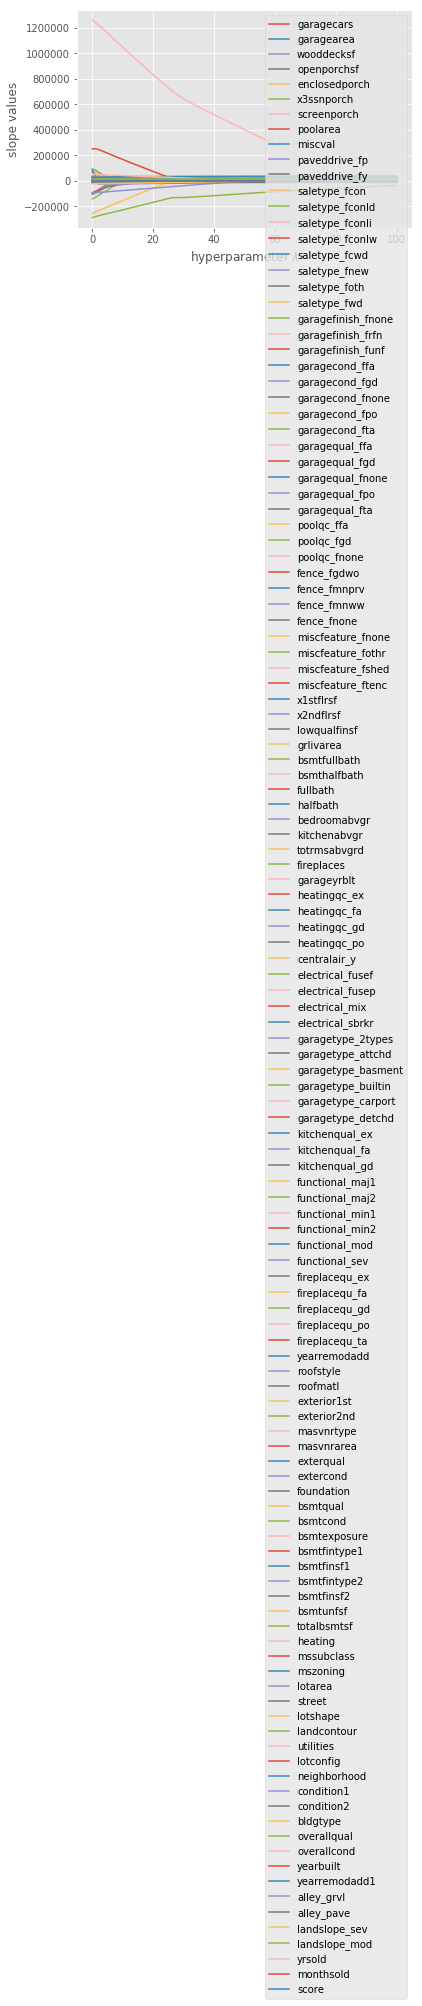

In [70]:
# for name in coefs_lasso.columns:
#     plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')
# plt.legend(loc=1)

In [25]:
lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(features_train, price_train).coef_

_ = plt.plot(range(len(X)), lasso_coef)
_ = plt.xticks(range(len(X)), X, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show()

NameError: name 'features_train' is not defined